In [2]:
#pip install plotly

In [3]:
#pip install -U kaleido

### Učitavanje biblioteka

In [4]:
# Biblioteke za pripremu podataka i vizualizaciju
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "png"

# pip install scikit-surprise
# Importovanje biblioteka za kreiranje modela i evaluaciju
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise import accuracy

### Učitavanje skupa podataka i pretprocesiranje

In [5]:
# Učitavanje skupa podataka

def loaddata(filename):
    df = pd.read_csv(f'{filename}.csv',sep=',',error_bad_lines=False, warn_bad_lines=False, encoding='latin-1')
    return df

amazon_data = loaddata('skup_amazon/fashionMeta')
data = loaddata('skup_amazon/fashion')

/tmp/ipykernel_20567/837364138.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



/tmp/ipykernel_20567/837364138.py:4: FutureWarning:

The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



/tmp/ipykernel_20567/837364138.py:4: DtypeWarning:

Columns (149,150,151,152,153,154,155,156,157,158,159,160,161,230,231,232,242,243,244,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,358,360,361,362,363,364,365,366,367,368,369,370,371,373,374,375,376,377,378,

In [17]:
amazon_data.head(3)

,title,brand,feature/0,feature/1,rank,date,asin,imageURL/0,imageURLHighRes/0,imageURL/1,...,similar_item/4/features/Item Weight,similar_item/4/features/Size,similar_item/4/features/character,similar_item/5/features/Color,similar_item/5/features/Item Dimensions,similar_item/5/features/Item Weight,similar_item/5/features/Size,similar_item/5/features/character,tech1/Folding,tech1/Item Dimensions L x W x H
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),Product Dimensions:\n \n8.7...,Shipping Weight:\n \n2.4 po...,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,Package Dimensions:\n \n8.5...,Shipping Weight:\n \n6.1 ou...,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
amazon_data.shape

(19999, 449)

In [7]:
data.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,image/6,image/7,image/8,image/9,image/10,image/11,image/12,image/13,style/Size Name:,style/Style:
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.shape

(19999, 29)

In [8]:
# Eliminisanje atributa koji nisu od značaja za dalju implementaciju

rating = data.drop(['verified', 'reviewTime', 'reviewerName', 'reviewText', 'summary','unixReviewTime', 'vote', 'style/Color:', 'style/Size:', 'image/0', 'style/Metal Type:', 'image/1', 'image/2', 'image/3', 'image/4', 'image/5', 'image/6', 'image/7', 'image/8', 'image/9', 'image/10', 'image/11', 'image/12', 'image/13', 'style/Size Name:', 'style/Style:'], axis=1)
rating

,overall,reviewerID,asin
0,5,A1D4G1SNUZWQOT,7106116521
1,2,A3DDWDH9PX2YX2,7106116521
2,4,A2MWC41EW7XL15,7106116521
3,2,A2UH2QQ275NV45,7106116521
4,3,A89F3LQADZBS5,7106116521
...,...,...,...
19994,5,A2I8U2L6ZOLPP9,B000P0X15G
19995,5,A38SLX4EMMLSTL,B000P0X15G
19996,5,A24NGH58L8CWDT,B000P0X15G
19997,5,A1NJ9OSQZOZB02,B000P0X15G


In [9]:
# Minimalna i maksimalna ocena koji je korisnik dao proizvodu

rating['overall'].min(), rating['overall'].max()

(1, 5)

In [10]:
rating.duplicated().sum()

182

In [11]:
# Eliminisanjje duplikata

rating.drop_duplicates(inplace=True)
rating

,overall,reviewerID,asin
0,5,A1D4G1SNUZWQOT,7106116521
1,2,A3DDWDH9PX2YX2,7106116521
2,4,A2MWC41EW7XL15,7106116521
3,2,A2UH2QQ275NV45,7106116521
4,3,A89F3LQADZBS5,7106116521
...,...,...,...
19994,5,A2I8U2L6ZOLPP9,B000P0X15G
19995,5,A38SLX4EMMLSTL,B000P0X15G
19996,5,A24NGH58L8CWDT,B000P0X15G
19997,5,A1NJ9OSQZOZB02,B000P0X15G


In [12]:
rating.shape

(19817, 3)

In [13]:
rating.duplicated().sum()

0

In [15]:
rating_types = rating['overall'].value_counts()
rating_types.index

Int64Index([5, 4, 3, 1, 2], dtype='int64')

In [16]:
rating_types.values

array([12549,  3587,  1639,  1071,   971])

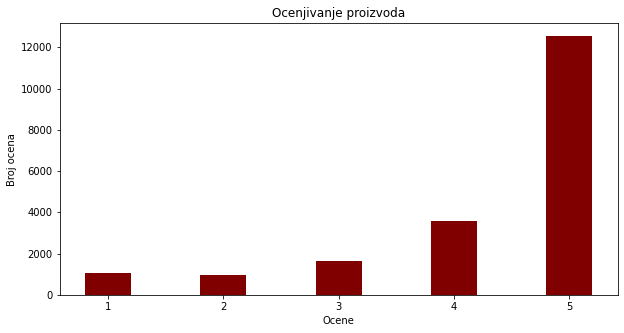

In [13]:
# Vizuelni prikaz koliko je kojih ocena dato od strane korisnika

rating_types = rating['overall'].value_counts()

fig = plt.figure(figsize = (10, 5))
plt.bar(rating_types.index, rating_types.values, color ='maroon', width = 0.4)


plt.xlabel("Ocene")
plt.ylabel("Broj ocena")
plt.title("Ocenjivanje proizvoda")
plt.show()

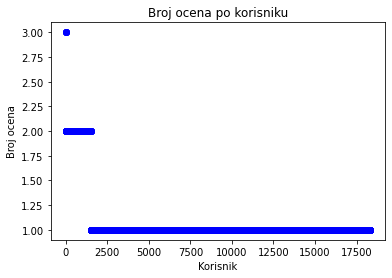

In [14]:
rating_users = rating['reviewerID'].value_counts().reset_index().\
               rename({'index':'reviewerID','reviewerID':'rating'}, axis=1)

plt.scatter(x=rating_users.index, y=rating_users['rating'], c="blue")


plt.xlabel("Korisnik")
plt.ylabel("Broj ocena")
plt.title("Broj ocena po korisniku")
plt.show()

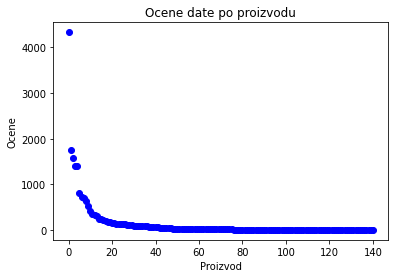

In [15]:
rating_products = rating['asin'].value_counts().reset_index().\
               rename({'Index':'asin','asin':'rating'}, axis=1)

plt.scatter(x = rating_products.index, y= rating_products['rating'], c="blue")


plt.xlabel("Proizvod")
plt.ylabel("Ocene")
plt.title("Ocene date po proizvodu")
plt.show()

In [16]:
rating = rating[rating['reviewerID'].isin(rating_users[rating_users['rating']>1]['reviewerID'])]
rating = rating[rating['asin'].isin(rating_products[rating_products['rating']>250]['index'])]

rating

,overall,reviewerID,asin
406,5,AVH1YOFM8WG9W,B00062NHH0
480,4,A39ZXN06R8UBQ0,B00062NHH0
840,5,A174NYS7K8Q24K,B00062NHH0
860,4,A1I32A4YCT5ITX,B00062NHH0
867,5,A1I32A4YCT5ITX,B00062NHH0
...,...,...,...
18161,5,AVH1YOFM8WG9W,B000OI56VG
18462,4,AFGGH4YX5U2R1,B000P0X15G
18735,4,A2ZN3Z5U9TV4C,B000P0X15G
19311,3,A35KNTHJO9Q3YE,B000P0X15G


In [17]:
# Spajanje tabela kako bi umesto id-a proizvoda bio prikazan naziv

rating = rating.merge(amazon_data, on="asin")[['reviewerID','title','overall']]
rating

,reviewerID,title,overall
0,AVH1YOFM8WG9W,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,5
1,A39ZXN06R8UBQ0,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,4
2,A174NYS7K8Q24K,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,5
3,A1I32A4YCT5ITX,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,4
4,A1I32A4YCT5ITX,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,5
...,...,...,...
2932,AVH1YOFM8WG9W,Ray-Ban Junior Kid's RJ9506S Aviator Sunglasses,5
2933,AFGGH4YX5U2R1,"i play. Girls' Baby Brim Sun Protection Hat, A...",4
2934,A2ZN3Z5U9TV4C,"i play. Girls' Baby Brim Sun Protection Hat, A...",4
2935,A35KNTHJO9Q3YE,"i play. Girls' Baby Brim Sun Protection Hat, A...",3


In [18]:
rating.drop_duplicates(inplace=True)
rating

,reviewerID,title,overall
0,AVH1YOFM8WG9W,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,5
1,A39ZXN06R8UBQ0,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,4
2,A174NYS7K8Q24K,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,5
3,A1I32A4YCT5ITX,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,4
4,A1I32A4YCT5ITX,Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt,5
...,...,...,...
2932,AVH1YOFM8WG9W,Ray-Ban Junior Kid's RJ9506S Aviator Sunglasses,5
2933,AFGGH4YX5U2R1,"i play. Girls' Baby Brim Sun Protection Hat, A...",4
2934,A2ZN3Z5U9TV4C,"i play. Girls' Baby Brim Sun Protection Hat, A...",4
2935,A35KNTHJO9Q3YE,"i play. Girls' Baby Brim Sun Protection Hat, A...",3


In [ ]:
list_of_distinct_users = list(rating['reviewerID'].unique())
list_of_distinct_users

In [20]:
# Kreiranje surprise objekta

reader = Reader(rating_scale=(1, 5))
data   = Dataset.load_from_df(rating[['reviewerID','title','overall']], reader)
data

In [48]:
# Podela podataka na trening i test skup. U Python-ovoj surprise dokumentaciji nalazi se detaljan opis.
# https://surprise.readthedocs.io/en/stable/FAQ.html

raw_ratings = data.raw_ratings
raw_ratings[:2] # tuples: korisnik, naslov proizvoda, ocena

[('AVH1YOFM8WG9W',
  "Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt",
  5.0,
  None),
 ('A39ZXN06R8UBQ0',
  "Calvin Klein Men's 3-Pack Classic V-Neck T-Shirt",
  4.0,
  None)]

In [49]:
import random
random.shuffle(raw_ratings)                 # shuffle-ovanje skupa podataka

threshold   = int(len(raw_ratings)*0.8)

train_raw_ratings = raw_ratings[:threshold] # 80% podataka je trening skup
test_raw_ratings  = raw_ratings[threshold:] # 20% podataka je test skup

data.raw_ratings = train_raw_ratings        # data je sada trening skup
trainset         = data.build_full_trainset() 
testset          = data.construct_testset(test_raw_ratings)

testset[:2]

[('A13N0LN619P19V',
  "Carhartt Men's Loose Fit Five Pocket Canvas Carpenter Pant B159",
  5.0),
 ('A2EA0LNYX7S3WE',
  "Carhartt Men's Loose Fit Five Pocket Canvas Carpenter Pant B159",
  5.0)]

In [52]:
data, data.raw_ratings[:2]

(<surprise.dataset.DatasetAutoFolds at 0x7f6cb4d0ae80>,
 [('A1CT1N98MMFUVN',
   "Carhartt Men's Loose Fit Five Pocket Canvas Carpenter Pant B159",
   3.0,
   None),
  ('A1AD3IQV5JWTT6',
   "Carhartt Men's Loose Fit Five Pocket Canvas Carpenter Pant B159",
   3.0,
   None)])

### Isprobavanje različitih modela, odabir najboljeg, evaluacija

In [24]:
# U nastavku su isprobane varijacije k-NN (eng. K-Nearest Neighbors) i SVD (eng. Singluar Value decomposition)
# algoritama koristeći podrazumevane parametre modela.

models=[KNNBasic(),KNNWithMeans(),KNNWithZScore(),KNNBaseline(),SVD()] 
results = {}

for model in models:
    # izvođenje 5-slojne unakrsne validacije (eng. 5 fold cross validation)
    # evaluacione metrike: mean absolute error (MAE) i root mean square error (RMSE)
    CV_scores = cross_validate(model, data, measures=["MAE","RMSE"], cv=5, n_jobs=-1)  
    
    # čuvanje prosečnog skora za 5-slojnu unakrsnu validaciju za svaki od modela
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).\
             rename({'test_mae':'MAE', 'test_rmse': 'RMSE'})
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result

In [25]:
performance_df = pd.DataFrame.from_dict(results)
print("Performanse modela: \n")
performance_df.T.sort_values(by='RMSE')

Performanse modela: 



,MAE,RMSE,fit_time,test_time
matrix_factorization.SVD,0.867750,1.101980,0.176200,0.003896
knns.KNNBasic,0.880254,1.110472,0.080414,0.006664
knns.KNNBaseline,0.880010,1.112268,0.106874,0.003639
knns.KNNWithZScore,0.894693,1.140163,0.225376,0.005911
knns.KNNWithMeans,0.896406,1.141539,0.173159,0.004205


In [26]:
# Među isprobanim aloritmima, najmanju grešku RMSE ima SVD.
# Što se tiče varijacija k-NN algoritama zasnovanih na memoriji, najmanju grešku RMSE ima KNNBasic.
# Maksimalan fit_time je za model KNNWithZScore, ali test_time je najmanje.

In [27]:
# Hyperparameter tuning korišćenjem GridSearchCV

# KNNBasic

# user_based: Podrazumevana vrednost ovog parametra je'True'.
# Druga opcija je 'False', što odgovara pristupu zasnovanom na stavkama.

# min_support: Označava broj stavki koji se uzima u razmatranje (u pristupu zasnovanom na korisnicima)
# ili broj korisnika koji se uzima u razmatranje (u pristupu zasnovanom na stavkama)
# da bi se izračunala sličnost.

# name: Označava naziv mere za računanje rastojanja koja se koristi da bi se izračunala sličnost.
# Podrazumevana vrednost je srednje kvadratna distanca (eng. Mean Squared Distance, MSD).
# Mera rastojanja za podatke zasnovane na ocenama koja se takođe često koristi je 'cosine'.

In [28]:
# Hyperparameter tuning - KNNBasic

param_grid = { 'sim_options' : {'name': ['msd','cosine'], \
                                'min_support': [3,5], \
                                'user_based': [False, True]}
             }

gridsearchKNNBasic = GridSearchCV(KNNBasic, param_grid, measures=['mae', 'rmse'], \
                                      cv=5, n_jobs=-1)
                                    
gridsearchKNNBasic.fit(data)

print(f'MAE najbolji parametri:  {gridsearchKNNBasic.best_params["mae"]}')
print(f'MAE najbolji skor:       {gridsearchKNNBasic.best_score["mae"]}\n')

print(f'RMSE najbolji parametri: {gridsearchKNNBasic.best_params["rmse"]}')
print(f'RMSE najbolji skor:      {gridsearchKNNBasic.best_score["rmse"]}\n')


MAE najbolji parametri:  {'sim_options': {'name': 'msd', 'min_support': 3, 'user_based': False}}
MAE najbolji skor:       0.8973147218293468

RMSE najbolji parametri: {'sim_options': {'name': 'msd', 'min_support': 3, 'user_based': False}}
RMSE najbolji skor:      1.136310769972861



In [29]:
# Najbolji parametri su isti za obe metrike - MAE i RMSE

# 'msd' kao mera rastojanja, min_support: 3 i user_based: False (pristup zasnovan na stavkama)

# Logika, odnosno kod u nastavku se može izmeniti tako da kreira preporuke koristeći cosine i user based metod

In [30]:
# Treniranje modela i predikcija - KNNBasic

sim_options = {'name':'msd','min_support':3,'user_based':False}
final_model = KNNBasic(sim_options=sim_options)

# Treniranje modela na trainset-u i predviđanje na testset-u, štampajući test accuracy
pred = final_model.fit(trainset).test(testset)

print(f'\nPerformanse na test skupu:')
print(f'MAE: {accuracy.mae(pred)}, RMSE: {accuracy.rmse(pred)}')


Computing the msd similarity matrix...
Done computing similarity matrix.

Performanse na test skupu:
MAE:  0.8617
RMSE: 1.0567
MAE: 0.8617459420172818, RMSE: 1.0566893152378167


In [31]:
# MAE i RMSE metrike za testset su uporedive sa onima dobijenim koristeći unakrsnu validaciju i 
# hyperparameter tuning za trainset, što znači da odabrani model dobro generalizuje

In [32]:
# SVD

# n_factors: broj latentnih faktora (eng. hidden characteristics) za matricu faktorizacije / redukcije dimenzionalnosti.
# Podrazumevano ova vrednost je 100.

# n_epochs: broj iteracija procedure stohastičkog gradijentnog spusta (eng. stochiastic gradient descent),
# za učenje parametara i minimizaciju greške

# lr_all i reg_all: learning rate i regularization rate.
# Learning rate je veličina koraka u gore pomenutom algoritmu SGD, gde regularization rate služi da
# spreči preprilagođavanje, tako da model generalizuje dobro nad podacima koje još nije video.
# Podrazumevano ove vrednosti su 0.005 i 0.02

In [33]:
# Hyperparameter tuning - SVD

param_grid = {"n_factors": range(10,100,20),
              "n_epochs" : [5, 10, 20],
              "lr_all"   : [0.002, 0.005],
              "reg_all"  : [0.2, 0.5]}

gridsearchSVD = GridSearchCV(SVD, param_grid, measures=['mae', 'rmse'], cv=5, n_jobs=-1)
                                    
gridsearchSVD.fit(data)

print(f'MAE Best Parameters:  {gridsearchSVD.best_params["mae"]}')
print(f'MAE Best Score:       {gridsearchSVD.best_score["mae"]}\n')

print(f'RMSE Best Parameters: {gridsearchSVD.best_params["rmse"]}')
print(f'RMSE Best Score:      {gridsearchSVD.best_score["rmse"]}\n')

MAE Best Parameters:  {'n_factors': 70, 'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.5}
MAE Best Score:       0.8647320755567606

RMSE Best Parameters: {'n_factors': 30, 'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.5}
RMSE Best Score:      1.0957389815676033



In [34]:
#Najbolji parametri su različiti za metrike MAE i RMSE.
#'n_factors':30, 'n_epochs':5, 'lr_all':0.002 i 'reg_all': 0.5 je odabrano za kreiranje preporuka

In [35]:
# Treniranje modela i predikcija - SVD

final_model = SVD(n_factors=30, n_epochs=5, lr_all=0.002, reg_all= 0.5)

# Treniranje modela na trening skupu (trainset) i predviđanje na test skupu (testset), štampajući test accuracy
pred = final_model.fit(trainset).test(testset)

print(f'\Performanse na skupu za testiranje')
print(f'MAE: {accuracy.mae(pred)}, RMSE: {accuracy.rmse(pred)}')


\Performanse na skupu za testiranje
MAE:  0.8403
RMSE: 1.0387
MAE: 0.8403193394292355, RMSE: 1.0386906276541776


In [36]:
# Metrike MAE i RMSE za test skup (testset) su uporedive sa onima dobijenim unakrsnom validacijom i
# hyperparameter tuning na skupu podataka za treniranje (trainset), što znači da odabrani model, ponovo,
# dobro generalizuje.

In [37]:
# KREIRANJE PREPORUKA

In [38]:
# Ceo skup podataka će biti korišćen za kreiranje preporuka.

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating[['reviewerID','title','overall']], reader)
trainset = data.build_full_trainset()

# Lista trainset metoda je objašnjena ovde: 
# https://surprise.readthedocs.io/en/stable/trainset.html

In [39]:
#Implementirane su dve različite funkcije za generisanje preporuka sa modelima koji su odabrani (KNNBasic i SVD)

In [40]:
# KNNBasic

def generate_recommendationsKNN(userID='AVH1YOFM8WG9W', like_recommend=5, get_recommend =10):
    
    ''' Ova funkcija generiše "get_recommend" preporuka proizvoda (odnosi se na broj preporuka) 
        koristeći KNNBasic i filtriranje zasnovano na stavkama.
        
        Parametri:
        (1) userID - userID za koga treba gerisati preporuke 
        (2) like_recommend - broj koliko prvih ocena korisnika (ocenjenih proizvoda korisnika)
        sa id-em userID se uzimaju u razmatranje za kreiranje preporuka
        (3) get_recommend - broj preporuka koje treba generisati
        
        Podrazumevane vrednosti su: userID="AVH1YOFM8WG9W", like_recommend=5, get_recommend=10
    '''
    
    # Izračunavanje matrice sličnosti zasnovane na stavkama
    sim_options       = {'name':'msd','min_support':3,'user_based':False}
    similarity_matrix = KNNBasic(sim_options=sim_options).fit(trainset).\
                        compute_similarities() 
    
    userID      = trainset.to_inner_uid(userID)    # konvertuje raw userID u innerID
    userRatings = trainset.ur[userID]              # metod .ur uzima korisnikov innerID i 
                                                   # nazad vraća korisnikovu ocenu
    
    
    # userRatings je lista tuple-ova [(,),(,),(,)..], gde svaki tuple sadrži proizvod i ocenu
    # datu od strane korisnika za tu stavku (proizvod). Tuple-ovi su sortirani unutar liste u opadajućem
    # redosledu, po oceni. Ekstraktovano je prvih 'like_recommend' stavki i ocena.
    
    temp_df = pd.DataFrame(userRatings).sort_values(by=1, ascending=False).\
              head(like_recommend)
    userRatings = temp_df.to_records(index=False) 
    
    # Za svaki par (item, rating) u prvih like_recommend parova, pomnožena je korisnikova ocena data za proizvod sa
    # vrednošću sličnosti (kasnije je izračunata iz matrice sličnosti stavki) za sve stavke.
    # Pomoću ovoga se računaju ocene sa težinama (eng. weighted rating) za sve stavke.
    # Ocene sa težinama su sabrane i podeljene sa sumom težina da bi se predvidela ocena koju je korisnik dao stavci.
    
    recommendations   = {}

    for user_top_item, user_top_item_rating  in userRatings:

        all_item_indices          =   list(pd.DataFrame(similarity_matrix)[user_top_item].index)
        all_item_weighted_rating  =   list(pd.DataFrame(similarity_matrix)[user_top_item].values*\
                                          user_top_item_rating)
        
        all_item_weights          =   list(pd.DataFrame(similarity_matrix)[user_top_item].values)
        
        
        # Sve stavke i konačno predviđene ocene se dodaju u rečnik nazvan recommendations.
        
        for index in range(len(all_item_indices)):
            if index in recommendations:
                # suma ocena sa težinama
                recommendations[index] += all_item_weighted_rating[index]        
            else:                        
                recommendations[index]  = all_item_weighted_rating[index]

    
    for index in range(len(all_item_indices)):                               
            if all_item_weights[index]  !=0:
                # Konačne ocene (suma ocena sa težinama/suma težina)
                recommendations[index]   =recommendations[index]/\
                                          (all_item_weights[index]*like_recommend)
                      

    # Konvertovanje rečnika preporuka u listu tuple-ova [(,),(,),(,)],
    # gde svaki tuple predstavlja stavku i procenjenu ocenu koju bi korisnik dao toj stavci.
    # Sortiranje tuple-ove u listi tako da budu u opadajućem redosledu, po procenjenoj oceni.

    temp_df = pd.Series(recommendations).reset_index().sort_values(by=0, ascending=False)
    recommendations = list(temp_df.to_records(index=False))
    
    # Vraća se get_recommend preporuka (odnosi se na broj preporuka)
    # (vraćaju se isključivo oni proizvodi koje korisnik nije prethodno ocenio)
    
    final_recommendations = []
    count = 0
    
    for item, score in recommendations:
        flag = True
        for userItem, userRating in trainset.ur[userID]:
            if item == userItem: 
                flag = False       # ako item u recommendations nije ocenjena od strane korisnika, 
                break              # dodaje se u final_recommendations
        if flag == True:
            final_recommendations.append(trainset.to_raw_iid(item)) 
            count +=1              # u trainset-u se stavke čuvaju kao inner id,  
                                   # to se konvertuje u originalan id i nadovezuje 
            
        if count > get_recommend:  # Uzima se samo 'get_recommend' preporuka (odnosi se na broj preporuka)
            break
    
    return(final_recommendations)

In [41]:
recommendationsKNN = generate_recommendationsKNN(userID='AVH1YOFM8WG9W', like_recommend=5, get_recommend=10)
recommendationsKNN

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


['Secret Wishes Deluxe Wonder Woman Costume, Blue/Red, Large',
 'California Costumes Fashion Flapper Adult Costume-',
 "Carhartt Men's Loose Fit Five Pocket Canvas Carpenter Pant B159",
 'Vans Adult Classic Slip-On, (Checkerboard) Black/Pewter',
 "Calvin Klein Boy's Assorted Boxer Briefs (Pack of 2)",
 'Powerstep Pinnacle Orthotic Shoe Insoles',
 "Havaianas Women's Top Flip Flop Sandal",
 'Sterling Silver Cubic Zirconia All-Around Band Stacking Ring Set (Set of 3)',
 "i play. Girls' Baby Brim Sun Protection Hat, Aqua Shellflowers, 0/6mo"]

In [42]:
# Izlaz iznad predstavlja top 10 preporuka za korisnika sa id-em 'AVH1YOFM8WG9W'
# zasnovano na top 5 ocenjenih proizvoda korisnika

In [43]:
# SVD

def generate_recommendationsSVD(userID='AVH1YOFM8WG9W', get_recommend =10):
    
    ''' Ova funkcija generiše "get_recommend" preporuka proizvoda (odnosi se na broj preporuka)
        koristeći SVD.
        
        Parametri:
        (1) userID - userID za koga preporuke trebaju biti generisane
        (2) get_recommend - broj preporuka koliko treba generisati
        
        Podrazumevane vrednosti parametara su: userID="AVH1YOFM8WG9W", get_recommend=10
    '''
    
    model = SVD(n_factors=30, n_epochs=5, lr_all=0.002, reg_all= 0.5)
    model.fit(trainset)
    
    # predviđa ocene za sve parove korisnika i stavki koje nisu u trainset-u
    
    testset = trainset.build_anti_testset()
    predictions = model.test(testset)
    predictions_df = pd.DataFrame(predictions)
    
    # uzima prvih get_recommend predikcija za userID
    
    predictions_userID = predictions_df[predictions_df['uid'] == userID].\
                         sort_values(by="est", ascending = False).head(get_recommend)
    
    recommendations = []
    recommendations.append(list(predictions_userID['iid']))
    recommendations = recommendations[0]
    
    return(recommendations)

In [44]:
recommendationsSVD = generate_recommendationsSVD(userID='AVH1YOFM8WG9W', get_recommend =10)
recommendationsSVD

["i play. Girls' Baby Brim Sun Protection Hat, Aqua Shellflowers, 0/6mo",
 'Sterling Silver Cubic Zirconia All-Around Band Stacking Ring Set (Set of 3)',
 'Vans Adult Classic Slip-On, (Checkerboard) Black/Pewter',
 "Carhartt Men's Loose Fit Five Pocket Canvas Carpenter Pant B159",
 'Secret Wishes Deluxe Wonder Woman Costume, Blue/Red, Large',
 "Calvin Klein Boy's Assorted Boxer Briefs (Pack of 2)",
 "Havaianas Women's Top Flip Flop Sandal",
 'California Costumes Fashion Flapper Adult Costume-',
 'Powerstep Pinnacle Orthotic Shoe Insoles']

In [45]:
# Izlaz iznad predstavlja top 10 preporuka za istog korisnika sa id-em 'AVH1YOFM8WG9W'

### Upoređivanje preporuka i zaključak

In [46]:
# Upoređivanje preporuka

# Preporuke generisane koristeci KNNBasic i SVD su iste, samo je redosled odnosno prioritet drugačiji,
# što je i očekivano s obzirom na to da su u pitanju različiti algoritmi.


# Zaključak i sledeći koraci

# Uspešno je implementiran pristup zasnovan na memoriji kao i pristup zasnovan na modelu za generisanje preporuka.
# U slučaju novog korisnika ili nove stavke, kada je malo toga poznato u vezi preferenci i ocena,
# uzajamno filtriranje nije dobra opcija za generisanje preporuka.
# Umesto toga, metodi zasnovani na sadržaju mogu biti pogodniji i davati bolje rezultate.
# Ovaj projekat može biti proširen implementacijom hiridnih sistema preporuka,
# kako bi se, u određenim situacijama, istakle prednosti jednog i zaobišle mane drugog pristupa.